## Observations and Insights 

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib.pyplot import figure
from scipy import stats

%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mice_number = combined_data["Mouse ID"].nunique()
mice_number

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
unique_mice = pd.DataFrame({"Mouse ID": duplicate_mice["Mouse ID"].unique()})
unique_mice

,Mouse ID
0,g989


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# get index numbers of entries with the duplicate mouse ID g989.
dup_index = combined_data[combined_data["Mouse ID"] == "g989"].index
clean_data = combined_data.drop(dup_index)

clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice in the clean DataFrame.
new_mice_number = clean_data["Mouse ID"].nunique()
new_mice_number 

248

## Summary Statistics

In [13]:
drug_group = clean_data.groupby(["Drug Regimen"])
drug_group.count().head(10)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_average = drug_group["Tumor Volume (mm3)"].mean()
tumor_median = drug_group["Tumor Volume (mm3)"].median()
tumor_variance = drug_group["Tumor Volume (mm3)"].var()
tumor_std = drug_group["Tumor Volume (mm3)"].std()
tumor_sem = drug_group["Tumor Volume (mm3)"].sem()

tumor_df = pd.DataFrame({"Mean": tumor_average, "Median": tumor_median, "Variance": tumor_variance,
                        "Standard Deviation": tumor_std, "SEM": tumor_sem})
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats = drug_group.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

tumor_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

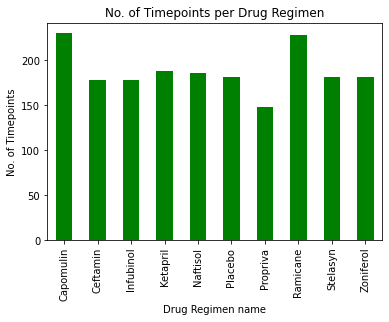

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

graph_data = drug_group["Timepoint"].count()

graph_data.plot(kind="bar", facecolor="green")

plt.title("No. of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen name")
plt.ylabel("No. of Timepoints");


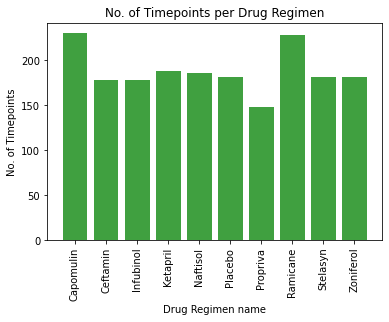

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo",
         "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

y_axis = drug_group["Timepoint"].count()
x_axis = np.arange(0, len(drugs))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("No. of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen name")
plt.ylabel("No. of Timepoints")
    
plt.bar(x_axis, y_axis, facecolor="green", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation=90)
plt.show()

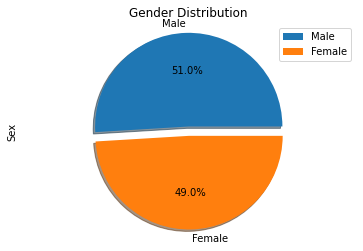

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data = clean_data["Sex"].value_counts()

gender_pie = gender_data.plot(kind="pie", y="sex", autopct='%1.1f%%', legend=True, explode=(0, 0.1),
                              shadow=True, startangle=0, title=("Gender Distribution"));

plt.axis("equal");

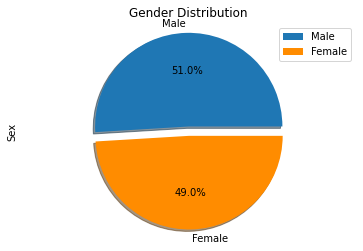

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = ["Male", "Female"]
gender_count = clean_data["Sex"].value_counts()
color = ["tab:blue", "darkorange"]
explode = (0, 0.1)
plt.title("Gender Distribution")
plt.pie(gender_count, explode=explode, labels=gender, colors=color,
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.legend(gender, loc="best")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Getting the data for the selected drugs
selected_treatment = clean_data.loc[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

selected_treatment 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_group = selected_treatment.groupby(["Mouse ID"])

final_tumor_vol = mouse_group.tail(1)

final_tumor_vol = final_tumor_vol.sort_values(["Drug Regimen", "Tumor Volume (mm3)"], ascending = (True, True))
final_tumor_vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
39,m601,Capomulin,Male,22,17,45,28.430964,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
430,a444,Ramicane,Female,10,25,45,43.047543,0
449,w678,Ramicane,Female,5,24,5,43.166373,0
447,r921,Ramicane,Female,5,25,30,43.419381,1
453,y449,Ramicane,Male,19,24,15,44.183451,0


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    

In [23]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = []

for drug in treatments:
    drug_data = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"].isin([drug]), ["Tumor Volume (mm3)"]]
    quartiles = drug_data["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    tumor_vol.append(drug_data["Tumor Volume (mm3)"])
    
    print(f"{drug} Summary:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The median of {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"-------------------------------------------- ")

Capomulin Summary:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------- 
Ramicane Summary:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------- 
Infubinol Summary:
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.741445

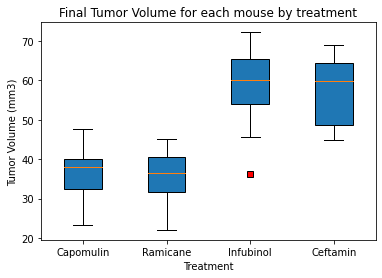

In [25]:
red_square = dict(markerfacecolor='r', marker='s')
plt.title("Final Tumor Volume for each mouse by treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment")
plt.boxplot(tumor_vol, labels=(treatments), flierprops=red_square, patch_artist=True)
plt.show()

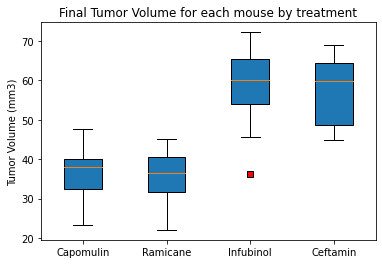

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()

ax1.set_title("Final Tumor Volume for each mouse by treatment")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, labels=(treatments), flierprops=red_square, patch_artist=True);

## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Mouse chosen: x401
x401_data = combined_data.loc[combined_data["Mouse ID"] == "x401"]
x401_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


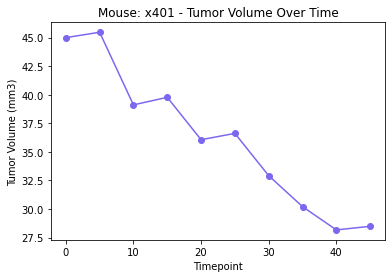

In [28]:
tumor_volume = x401_data["Tumor Volume (mm3)"]
time_point = x401_data["Timepoint"]

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse: x401 - Tumor Volume Over Time")
plt.plot(time_point, tumor_volume, color="mediumslateblue", label="Tumor Volume", marker="o");

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [35]:
mouse_group = capomulin_data.groupby(["Mouse ID"]).mean()
mouse_group[["Weight (g)", "Tumor Volume (mm3)"]].head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


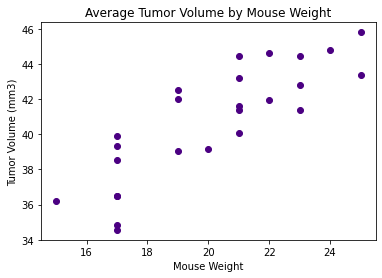

In [36]:
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Mouse Weight")
plt.scatter(mouse_group["Weight (g)"], mouse_group["Tumor Volume (mm3)"], marker="o", color="indigo")
plt.show()

In [32]:
capomulin_data = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
weight_group = capomulin_data.groupby(["Weight (g)"])

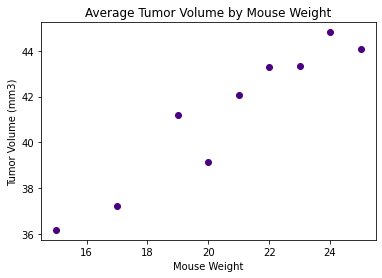

In [37]:
avg_tumor = weight_group["Tumor Volume (mm3)"].mean()
avg_df = pd.DataFrame({"Average Tumor Vol": avg_tumor})
avg_df = avg_df.reset_index()

plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Mouse Weight")
plt.scatter(avg_df["Weight (g)"], avg_df["Average Tumor Vol"], marker="o", color="indigo")
plt.show()

## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

The correlation coefficient between tumor volume and weight is 0.84


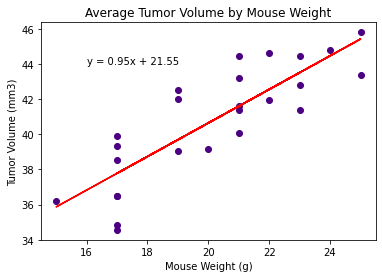

In [64]:
weight = mouse_group["Weight (g)"]
tumor = mouse_group["Tumor Volume (mm3)"]

correlation = st.pearsonr(weight,tumor)
print(f"The correlation coefficient between tumor volume and weight is {round(correlation[0],2)}")

wt_slope, wt_int, wt_r, wt_p, wt_std_err = stats.linregress(weight, tumor)
wt_fit = wt_slope * weight + wt_int
line_eq = "y = " + str(round(wt_slope,2)) + "x + " + str(round(wt_int,2))

plt.plot(weight, vc_fit, "r-")
plt.annotate(line_eq,(16,44), fontsize=10, color="black")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Mouse Weight")
plt.scatter(mouse_group["Weight (g)"], mouse_group["Tumor Volume (mm3)"], marker="o", color="indigo")
plt.show()